# Exploratory Data Analysis - Intro

#### Goal

1) Investigate top-paying roles and skills in the data science industry.
2) Use Python to explore a real-live dataset on job postings.

#### Questions to Answer

1) What are the most demanded skills for the top 3 most popular data roles?
2) How are in-demand skills trending for Data Analysts?
3) How well do jobs and skills pay for Data Analysts?
4) What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)


#### Importing Dataset:

In [89]:
# Import Data & Libraries
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

#### Roles to Investigate:

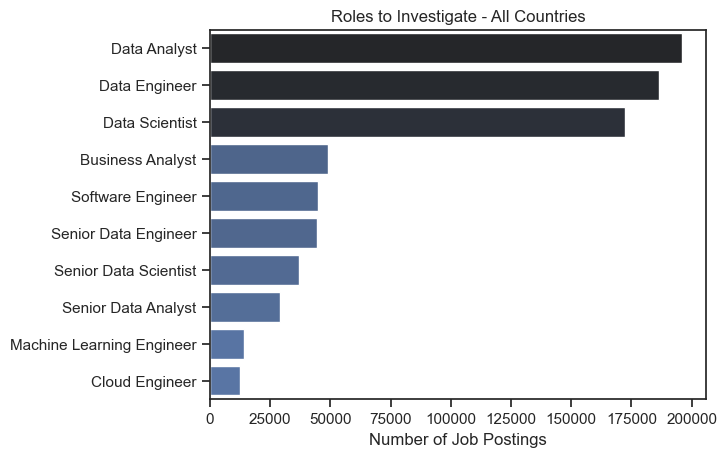

In [ ]:
df_roles = df['job_title_short'].value_counts().sort_values(ascending=False).reset_index()

# Plotting
sns.barplot(data=df_roles, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.title('Roles to Investigate - All Countries')
plt.show()

#### Companies to Investigate

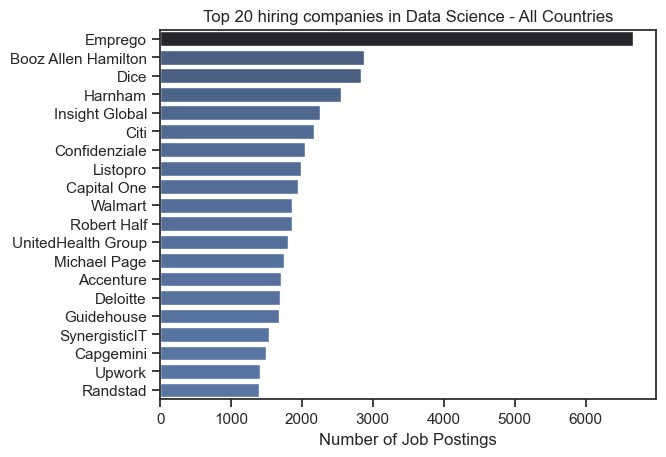

In [147]:
df_companies = df['company_name'].value_counts().sort_values(ascending=False).head(20).reset_index()

# Plotting
sns.barplot(data=df_companies, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.title('Top 20 hiring companies in Data Science - All Countries')
plt.show()

#### Countries to Investigate:


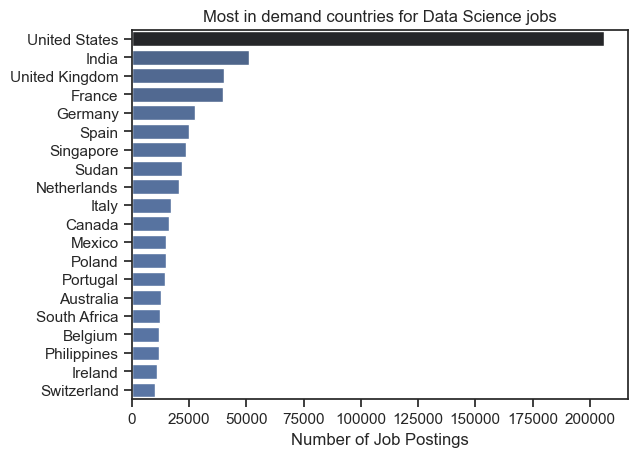

In [144]:
df_countries = df['job_country'].value_counts().sort_values(ascending=False).head(20).reset_index()

# Plotting
sns.barplot(data=df_countries, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.title('Most in demand countries for Data Science jobs')
plt.show()

But this analysis is not enough. The criteria for country selection are:
- **Job Offering**: prioritize countries with a bigger offer of jobs in data science field
- **Higher Salaries**: use median salary to compare the median salary 
- **Salary Data Availability**: focus on countries where there are more salary data to analyze

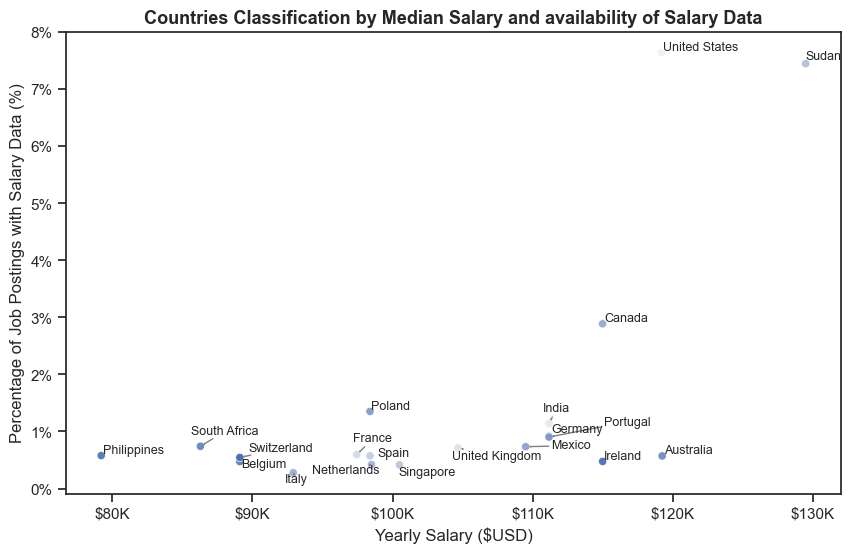

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

# Compute total job counts per country
total_counts = df['job_country'].value_counts().rename('total_count')

# Compute counts where salary_year_avg is not null
salary_counts = df[~df['salary_year_avg'].isna()]['job_country'].value_counts().rename('salary_count')

# Compute the percentage of job postings with salary data per country
salary_percentage = (salary_counts / total_counts * 100).rename('salary_percentage')

# get median salary for each country
median_salary = df.groupby('job_country')['salary_year_avg'].median().rename('median_salary')

# Merge the two counts into a single DataFrame
country_counts = pd.concat([total_counts, salary_percentage, median_salary], axis=1).fillna(0)

# Keep only the top 10 countries by total number of job postings
country_counts = country_counts.head(20)

#Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(
        data=country_counts, 
        x='median_salary', 
        y='salary_percentage', 
        hue=country_counts.index, 
        palette='light:b', 
        legend=False,
)
# Formatting axes
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'{y:.0f}%'))

# Set countries as labels
texts=[]
for i in range(len(country_counts)):
    texts.append(plt.text(country_counts['median_salary'].iloc[i], country_counts['salary_percentage'].iloc[i], country_counts.index[i], fontsize=9))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

#Set Title and Labels
plt.title('Countries Classification by Median Salary and availability of Salary Data', fontsize=13, weight='bold')    
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Percentage of Job Postings with Salary Data (%)')

plt.show()



Most countries lack of salary specification in the job offering. Being the offered salary a key parameter in the current analysis, the choice of the country must be impacted by data availability.

Therefore the **country of choice are the United States** since Sudan is likely to have corrupted data inside this data frame

#### Filter for US Data Analyst roles

#### Work Locations to Investigate:

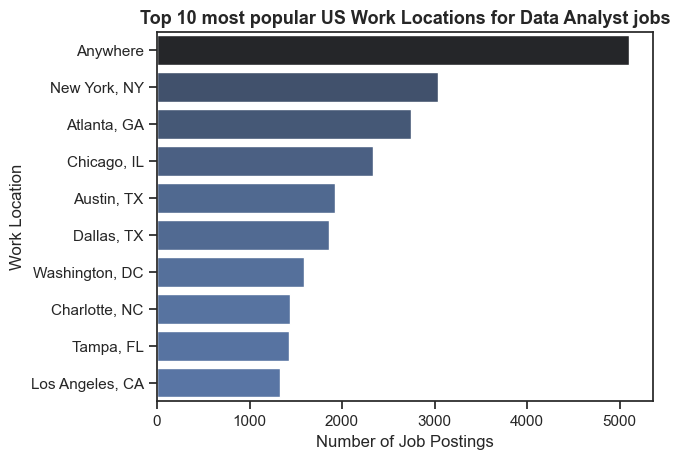

In [132]:
# Data Frame for Data Analyst jobs in the US
df_da_us = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

# Get top 10 locations
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

# Plot with Seaborn
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)

# set title and labels
plt.title('Top 10 most popular US Work Locations for Data Analyst jobs', fontsize=13, weight='bold')
plt.xlabel('Number of Job Postings')
plt.ylabel('Work Location')

plt.show()


#### Job Requirement and Benefits:

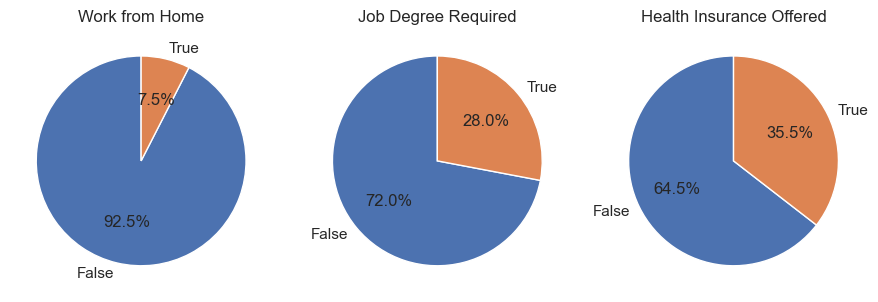

In [ ]:
# Subplot for multiple pie charta
ig, ax = plt.subplots(1, 3, figsize=(9,9))

# create dictionary of columns and tiles 
dict_column={
    'job_work_from_home' : 'Work from Home',
    'job_no_degree_mention' : 'Job Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
}

# plot with for loop
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
fig.tight_layout()
plt.show()

#### Top 10 US Hiring Companies for Data Analyst:

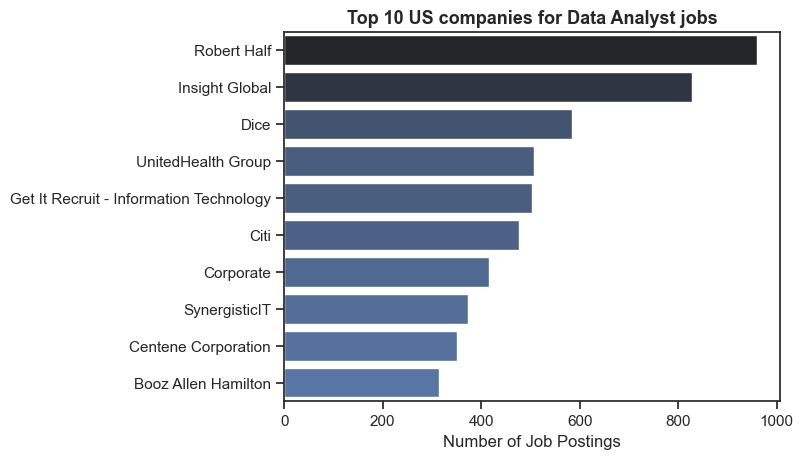

In [135]:
# Data Frame for Data Analyst jobs in the US
df_da_us = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

# Get top 10 locations
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

# Plot with Seaborn
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)

# set title and labels
plt.title('Top 10 US companies for Data Analyst jobs', fontsize=13, weight='bold')
plt.xlabel('Number of Job Postings')
plt.ylabel('')

plt.show()